# СЕМИНАР 3: МЕТОД МАКСИМАЛЬНОГО ПРАВДОПОДОБИЯ

На лекции мы рассмотрели теоретические основы метода максимального правдоподобия и даже вывели несколько оценок ММП руками.

Попробуем провернуть аналогичные операции в Python


## Практический минимум

In [3]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy.optimize import minimize

import seaborn as sns
import matplotlib.pyplot as plt

* Попробуем оценить параметры нормального распределения для следующей выборки:

In [5]:
x = [3.2 , 7.9, 5.4, 4.9, 6.2, 4.3]

1. Напишем ф-ю логарифма макс. правдоподобия, которая принимает на вход массив из двух параметров норм. распр-я и нашу выборку.

   Возвращает значение лог-функции правдоподобия

In [7]:
def lnL(theta, x):
    mu = theta[0]
    s2 = np.exp(theta[1])

    x = np.array(x)
    n = x.size

    l = -0.5*n*np.log(s2) - 0.5/s2*np.sum((x-mu)**2) # лог ф-я правдоподобия для норм. распр-я

    return - l # на минус 1 домножаем в силу того, что в scipy есть только функция minimize

# Проверка, что работает
print(lnL([4, 0.2], x))

10.240554617493236


2. Оценим параметры

In [9]:
theta_int = [0,0] # initial guess
res = minimize(lnL, theta_int, args=x)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.353606615954067
        x: [ 5.317e+00  7.845e-01]
      nit: 14
      jac: [-1.848e-06  2.146e-06]
 hess_inv: [[ 3.529e-01  1.311e-02]
            [ 1.311e-02  3.199e-01]]
     nfev: 51
     njev: 17

In [10]:
mu, s2 = res.x
s2 = np.sqrt(np.exp(s2))
mu, s2

(5.316665962642209, 1.48033456084911)

3. Получим тот же результат, используя встроенный метод stats.norm.fit(x)

In [12]:
mu, s = stats.norm.fit(x)
mu, s

(5.316666666666666, 1.4803340463857775)

4. Построим 95% доверительный интервал для среднего

In [14]:
res.hess_inv

array([[0.35286303, 0.01310731],
       [0.01310731, 0.31985441]])

In [15]:
alpha = 0.05

z = stats.norm().ppf(1-alpha/2)

left = res.x[0] - z*np.sqrt(res.hess_inv[0,0])
right = res.x[0] + z*np.sqrt(res.hess_inv[0,0])

print(f'Доверительный интервал для среднего: [{left} ; {right}]')

Доверительный интервал для среднего: [4.1524027544424245 ; 6.480929170841994]


Ниже на примере нормального распределения написан пайплайн запуска теста отношения правдоподобий

In [17]:
np.random.seed(42)

n = 100          # размер выборки
mu_true = 0      # истинное среднее
sigma = 1        # известное стандартное отклонение
alpha = 0.05     # уровень значимости

hypo_mu = 0.15   # наше предположение о параметре как исследователей

# Генерируем выборку из нормального распределения
data = np.random.normal(loc=mu_true, scale=sigma, size=n)

# Оценка параметра при H1 (альтернативная гипотеза)
# MLE для параметра `mu` при нормальном распределении с известной дисперсией – выборочное среднее
mu_hat = np.mean(data)
print('Оцененное среднее:', mu_hat)

# Вычисление логарифмов правдоподобия
logL_R = np.sum(stats.norm.logpdf(data, loc=hypo_mu, scale=sigma))     # при mu = hypo_mu (H0)
logL_UR = np.sum(stats.norm.logpdf(data, loc=mu_hat, scale=sigma))  # при mu = mu_hat (H1)

# Вычисление статистики теста: -2 * (logL_R - logL_UR)
test_statistic = -2 * (logL_R - logL_UR)
print("Статистика теста: {:.4f}".format(test_statistic))

# Вычисление критического значения для уровня значимости alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, df=1)
print("Критическое значение: {:.4f}".format(critical_value))

# Вычисление p-value c 1 степенью свободы, ибо мы ограничили один параметр
p_value = 1 - stats.chi2.cdf(test_statistic, df=1)
print("p-value: {:.4f}".format(p_value))

# Принятие решения
if p_value < alpha:
    print(f"Отвергаем H0: данные не согласуются с предположением mu = {hypo_mu}")
else:
    print(f"Нет оснований отвергать H0: данные согласуются с предположением mu = {hypo_mu}")

Оцененное среднее: -0.10384651739409384
Статистика теста: 6.4438
Критическое значение: 3.8415
p-value: 0.0111
Отвергаем H0: данные не согласуются с предположением mu = 0.15


5. Попробуйте провести тест отношения правдоподобий в предыдущей задаче с гипотезой о том, что среднее равняется единице

In [19]:
### YOUR CODE HERE
np.random.seed(42)

# Параметры задачи
n = 100          # размер выборки
mu_true = 0      # истинное среднее
sigma = 1        # известное стандартное отклонение
alpha = 0.05     # уровень значимости
hypo_mu = 1      # наше предположение о параметре как исследователей

# Генерируем выборку из нормального распределения
data = np.random.normal(loc=mu_true, scale=sigma, size=n)

# Оценка параметра при H1 (альтернативная гипотеза)
mu_hat = np.mean(data)  # MLE для параметра mu при нормальном распределении с известной дисперсией – выборочное среднее

print('Оцененное среднее:', mu_hat)

# Вычисление логарифмов правдоподобия
logL_R = np.sum(stats.norm.logpdf(data, loc=hypo_mu, scale=sigma))  # при mu = hypo_mu (H0)
logL_UR = np.sum(stats.norm.logpdf(data, loc=mu_hat, scale=sigma))  # при mu = mu_hat (H1)

# Вычисление статистики теста: -2 * (logL_R - logL_UR)
test_statistic = -2 * (logL_R - logL_UR)
print("Статистика теста: {:.4f}".format(test_statistic))

# Вычисление критического значения для уровня значимости alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, df=1)
print("Критическое значение: {:.4f}".format(critical_value))

# Вычисление p-value с 1 степенью свободы, ибо мы ограничили один параметр
p_value = 1 - stats.chi2.cdf(test_statistic, df=1)
print("p-value: {:.4f}".format(p_value))

# Принятие решения
if p_value < alpha:
    print(f"Отвергаем Н0: данные не согласуются с предположением mu = {hypo_mu}")
else:
    print(f"Нет оснований отвергать Н0: данные согласуются с предположением mu = {hypo_mu}")

Оцененное среднее: -0.10384651739409384
Статистика теста: 121.8477
Критическое значение: 3.8415
p-value: 0.0000
Отвергаем Н0: данные не согласуются с предположением mu = 1


6. А теперь тест отношения правдоподобий с гипотезой о том, что среднее равно единице, а дисперсия двойке

In [21]:
### YOUR CODE HERE
np.random.seed(42)

# Параметры задачи
n = 100          # размер выборки
mu_true = 0      # истинное среднее
sigma = 2        # известное стандартное отклонение
alpha = 0.05     # уровень значимости
hypo_mu = 1      # наше предположение о параметре как исследователей

# Генерируем выборку из нормального распределения
data = np.random.normal(loc=mu_true, scale=sigma, size=n)

# Оценка параметра при H1 (альтернативная гипотеза)
mu_hat = np.mean(data)  # MLE для параметра mu при нормальном распределении с известной дисперсией – выборочное среднее

print('Оцененное среднее:', mu_hat)

# Вычисление логарифмов правдоподобия
logL_R = np.sum(stats.norm.logpdf(data, loc=hypo_mu, scale=sigma))  # при mu = hypo_mu (H0)
logL_UR = np.sum(stats.norm.logpdf(data, loc=mu_hat, scale=sigma))  # при mu = mu_hat (H1)

# Вычисление статистики теста: -2 * (logL_R - logL_UR)
test_statistic = -2 * (logL_R - logL_UR)
print("Статистика теста: {:.4f}".format(test_statistic))

# Вычисление критического значения для уровня значимости alpha = 0.05
critical_value = stats.chi2.ppf(1 - alpha, df=1)
print("Критическое значение: {:.4f}".format(critical_value))

# Вычисление p-value с 1 степенью свободы, ибо мы ограничили один параметр
p_value = 1 - stats.chi2.cdf(test_statistic, df=1)
print("p-value: {:.4f}".format(p_value))

# Принятие решения
if p_value < alpha:
    print(f"Отвергаем Н0: данные не согласуются с предположением mu = {hypo_mu}")
else:
    print(f"Нет оснований отвергать Н0: данные согласуются с предположением mu = {hypo_mu}")

Оцененное среднее: -0.20769303478818768
Статистика теста: 36.4631
Критическое значение: 3.8415
p-value: 0.0000
Отвергаем Н0: данные не согласуются с предположением mu = 1


## Практика

* На практике для давно известных распределений никто не оценивает параметры ММП в каждой задаче, а просто используют уже известные оценки, выведенные в общем виде.

* Например, для аналитики спорта очень часто используют Пуассоновское распределение.

* Им моделируют, например, общее кол-во голов в матче, голы домашней команды, команды соперника, кол-во успешных действий конкретного игрока, кол-во красных и желтых карточек... В общем любой "подсчет" в единицу времени

* В этой практике попробуем немного погрузиться в экономику спорта

В данной задачи будем использовать данные с <https://footystats.org/> о матчах в самых известных футбольных премьер лигах за 5 последних сезонов.

Данные можно загрузить по ссылке: https://drive.google.com/drive/folders/16WZMzHd74W-O_NdUgsEPjJ9rTXywsN1t?usp=drive_link

Описание данных можно найти здесь: https://footystats.org/api/documentations/match-schedule-and-stats

### TASK 1 (OPTIONAL) 

Если есть желание попрактиковаться, попробуйте вывести оценки ММП для распределение Пуассона в общем виде

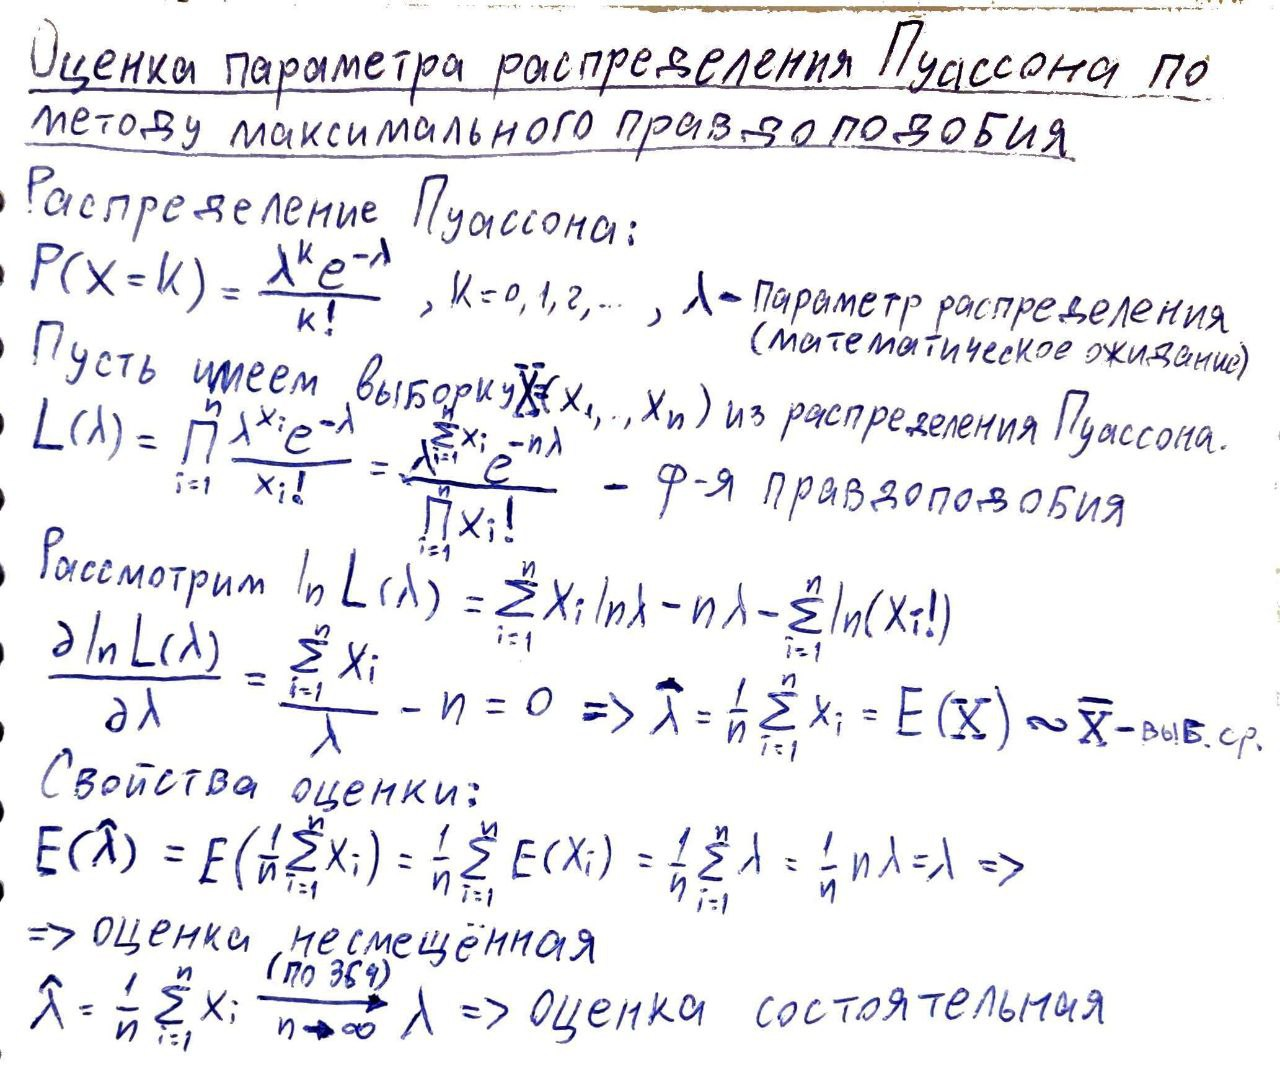

### TASK 2: Спорт как Пуассоновская модель

* Объедините все голы, забитые во всех матчах: и домашние, и гостевые, либо возьмите готовый столбец из данных. 

* Предположив, что общее количество голов в лиге подчиняется распределению Пуассона, найдите оценку максимального правдоподобия для параметра λ (среднее количество голов за матч в лиге)

* Насколько она устойчива к изменению выборки (например, если взять только матчи одной команды или одного сезона)?

* Графические иллюстрации приветствуются, но не обязательны :)

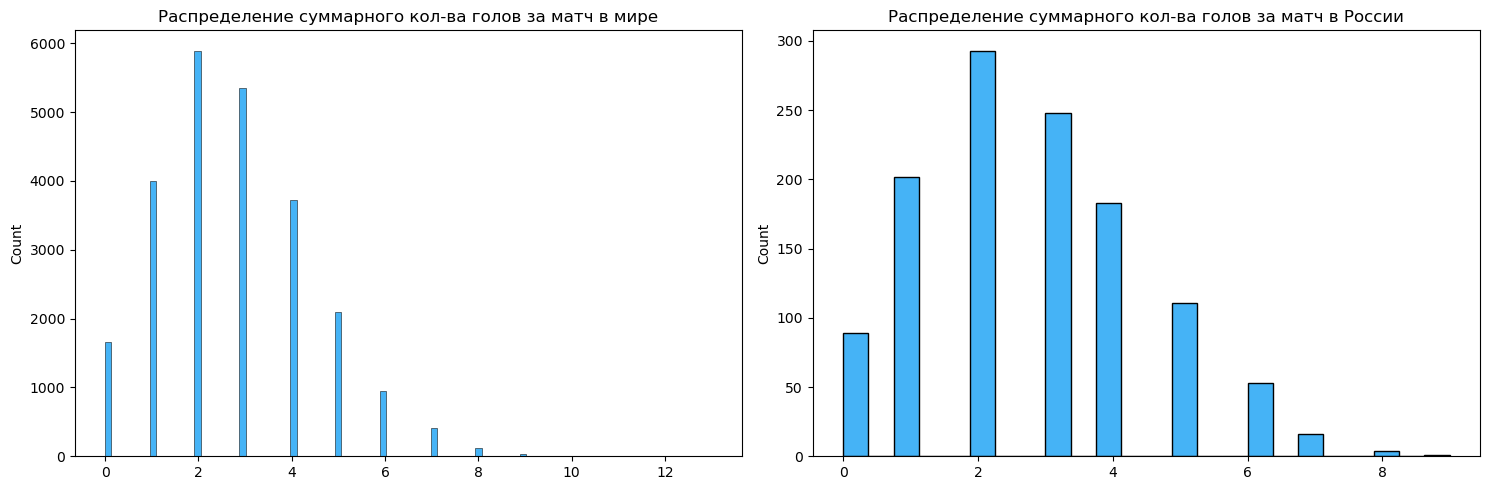

МП-оценка параметра lambda в выборке по всему миру: 2.77
МП-оценка параметра lambda в выборке по России: 2.74
По КС-тесту выборки принадлежат одному распределению с вероятностью: 0.99969


In [27]:
### YOUR CODE HERE
import os

leagues_path = os.listdir("Footystats/")
leagues_pathes = [f"Footystats/{league}/" for league in leagues_path]
datasets_pathes = []
for league in leagues_pathes:
    datasets = os.listdir(league)
    data_pathes = [league+dataset for dataset in datasets]
    for item in data_pathes:
        datasets_pathes.append(item)
total_goal_count = []
for dataset in datasets_pathes:
    df = pd.read_csv(dataset)
    goals_all = df['total_goal_count'].to_numpy()
    for goals in goals_all:
        if not np.isnan(goals):
            total_goal_count.append(goals)
rus_goal_count = []
for dataset in datasets_pathes:
    if 'Russia - Premier League' in dataset:
        df = pd.read_csv(dataset)
        goals_all = df['total_goal_count'].to_numpy()
        for goals in goals_all:
            if not np.isnan(goals):
                rus_goal_count.append(goals)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(total_goal_count, edgecolor='black', color='#069AF3', ax=ax1)
sns.histplot(rus_goal_count, edgecolor='black', color='#069AF3', ax=ax2)
ax1.set_title('Распределение суммарного кол-ва голов за матч в мире')
ax2.set_title('Распределение суммарного кол-ва голов за матч в России')
plt.tight_layout()
plt.show()

# МП-оценка параметра lambda в распределении Пуассона <=> Выборочное среднее
print(f'МП-оценка параметра lambda в выборке по всему миру: {np.array(total_goal_count).mean():.2f}')
print(f'МП-оценка параметра lambda в выборке по России: {np.array(rus_goal_count).mean():.2f}')

_, pvalue = stats.ks_2samp(total_goal_count, rus_goal_count)
print(f'По КС-тесту выборки принадлежат одному распределению с вероятностью: {pvalue:.5f}')

### TASK 3: Стиль игры

1. Выберите одну конкретную команду. Оцените два параметра:

* λ_attack – среднее количество голов, забиваемое этой командой за матч (используйте данные по всем матчам, где она играла).

* λ_defence – среднее количество голов, пропускаемых этой командой за матч.

2. Сравните λ_attack и λ_defence для этой команды. Что это говорит о ее стиле игры? Является ли она атакующей, оборонительной или сбалансированной?

In [29]:
### YOUR CODE HERE
CSKA_atack, CSKA_defence = [], []
for dataset in datasets_pathes:
    if 'Russia - Premier League' in dataset:
        df = pd.read_csv(dataset)
        df_CSKA_home = df.where(df['home_team_name'] == 'CSKA Moskva').dropna()
        df_CSKA_away = df.where(df['away_team_name'] == 'CSKA Moskva').dropna()
        df_CSKA_home_atack = df_CSKA_home['home_team_goal_count'].to_numpy()
        df_CSKA_home_defence = df_CSKA_home['away_team_goal_count'].to_numpy()
        df_CSKA_away_atack = df_CSKA_away['away_team_goal_count'].to_numpy()
        df_CSKA_away_defence = df_CSKA_away['home_team_goal_count'].to_numpy()
        for item in df_CSKA_home_atack:
            CSKA_atack.append(item)
        for item in df_CSKA_home_defence:
            CSKA_defence.append(item)
        for item in df_CSKA_away_atack:
            CSKA_atack.append(item)
        for item in df_CSKA_away_defence:
            CSKA_defence.append(item)
CSKA_atack = np.array(CSKA_atack)
CSKA_atack = CSKA_atack[~np.isnan(CSKA_atack)]
CSKA_defence = np.array(CSKA_defence)
CSKA_defence = CSKA_defence[~np.isnan(CSKA_defence)]
print(f'Среднее количество голов, забиваемое командой ЦСКА за матч: {np.array(CSKA_atack).mean():.3f}')
print(f'Среднее количество голов, пропускаемых командой ЦСКА за матч: {np.array(CSKA_defence).mean():.3f}')
print('Вывод: У команды сбалансированный тип игры')

Среднее количество голов, забиваемое командой ЦСКА за матч: 1.889
Среднее количество голов, пропускаемых командой ЦСКА за матч: 1.889
Вывод: У команды сбалансированный тип игры


### TASK 4: Существует ли эффект домашнего поля?

* Формулировка гипотезы: Команды в среднем забивают больше голов, играя дома, чем в гостях.


1. Для выбранной команды (или для всех команд в совокупности) оцените λ_home (средние голы дома) и λ_away (средние голы в гостях).

2. Постройте 95% доверительные интервалы для λ_home и λ_away (можно использовать свойство асимптотической нормальности оценки ММП). Перекрываются ли они?

3. Проверьте гипотезу H₀: λ_home > λ_away против H₁: λ_home = λ_away (Hint: можно использовать тест отношения правдоподобия).

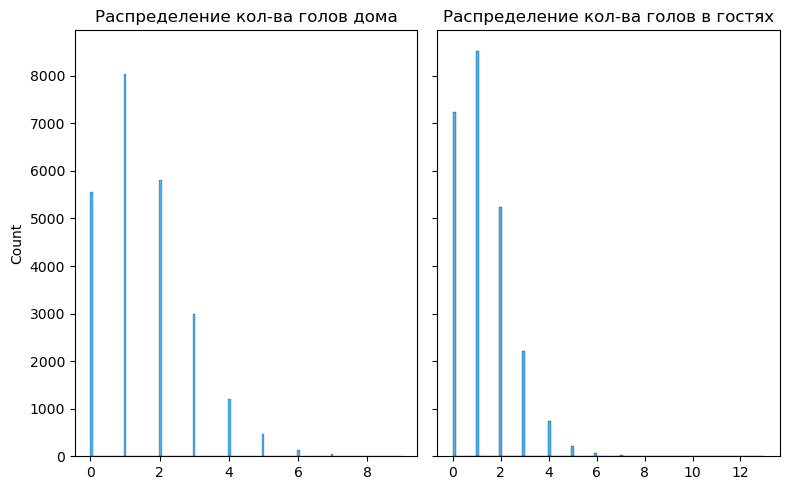

In [31]:
### YOUR CODE HERE
home, away = [], []
for dataset in datasets_pathes:
    df = pd.read_csv(dataset)
    df_home = df['home_team_goal_count'].to_numpy()
    df_away = df['away_team_goal_count'].to_numpy()
    for item in df_home:
        home.append(item)
    for item in df_away:
        away.append(item)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5), sharey=True)
sns.histplot(home, edgecolor='black', color='#069AF3', ax=ax1)
sns.histplot(away, edgecolor='black', color='#069AF3', ax=ax2)
ax1.set_title('Распределение кол-ва голов дома')
ax2.set_title('Распределение кол-ва голов в гостях')
plt.tight_layout()
plt.show()

In [32]:
home = np.array(home)
home = home[~np.isnan(home)]
away = np.array(away)
away = away[~np.isnan(away)]

# Оценка параметров
lambda_home = np.mean(home)
lambda_away = np.mean(away)

# Доверительные интервалы
alpha = 0.05
z_alpha = stats.norm.ppf(1 - alpha / 2)

ci_home = (
    lambda_home - z_alpha * np.sqrt(lambda_home / len(home)),
    lambda_home + z_alpha * np.sqrt(lambda_home / len(home))
)

ci_away = (
    lambda_away - z_alpha * np.sqrt(lambda_away / len(away)),
    lambda_away + z_alpha * np.sqrt(lambda_away / len(away))
)

print(f"Доверительный интервал для λ_home: {ci_home}")
print(f"Доверительный интервал для λ_away: {ci_away}")

# Тест отношения правдоподобия
def log_likelihood(data, lambda_):
    return np.sum(data * np.log(lambda_) - lambda_ - data)

ll_home = log_likelihood(home, lambda_home)
ll_away = log_likelihood(away, lambda_away)
ll_pool = log_likelihood(np.concatenate((home, away)), np.mean(np.concatenate((home, away))))

LR = 2 * (ll_home + ll_away - ll_pool)
p_value = 1 - stats.chi2.cdf(LR, df=1)

print(f"Статистика теста LR: {LR}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем Н0: данные подтверждают, что λ_home > λ_away")
else:
    print("Нет оснований отвергать Н0")

Доверительный интервал для λ_home: (1.5067978064360161, 1.5378527810717142)
Доверительный интервал для λ_away: (1.2334801907029949, 1.2615929900844716)
Статистика теста LR: 662.301182308147
p-value: 0.0
Отвергаем Н0: данные подтверждают, что λ_home > λ_away
